In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [2]:
# Reading data
data = pd.read_excel("Approval.xlsx")
data.head(5)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [3]:
# Getting dimensions of array
data.shape

(690, 16)

In [4]:
# Verifying dataset by checking first 10 rows
data.head(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


In [5]:
# Verifying dataset by checking last 5 rows
data.tail()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0
689,1,35.00,3.375,1,1,Energy,Black,8.29,0,0,0,1,ByBirth,0,0,0


In [6]:
# Descriptive stats
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB
None


In [7]:
# Descriptive stats
print(data.describe)

<bound method NDFrame.describe of      Gender    Age    Debt  Married  BankCustomer         Industry Ethnicity  \
0         1  30.83   0.000        1             1      Industrials     White   
1         0  58.67   4.460        1             1        Materials     Black   
2         0  24.50   0.500        1             1        Materials     Black   
3         1  27.83   1.540        1             1      Industrials     White   
4         1  20.17   5.625        1             1      Industrials     White   
..      ...    ...     ...      ...           ...              ...       ...   
685       1  21.08  10.085        0             0        Education     Black   
686       0  22.67   0.750        1             1           Energy     White   
687       0  25.25  13.500        0             0       Healthcare    Latino   
688       1  17.92   0.205        1             1  ConsumerStaples     White   
689       1  35.00   3.375        1             1           Energy     Black   

     

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


In [9]:
# Impute missing values (if any)
# for numeric data using mean
data_imputed = data.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x)

In [10]:
# For non numeric data using mode
data_imputed = data.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x)

In [11]:
data.head(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


In [12]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
for col in categorical_cols:
    encoded_columns = pd.DataFrame(ohe.fit_transform(data[[col]]), columns=ohe.get_feature_names_out([col]))
    data = pd.concat([data, encoded_columns], axis=1)
    data.drop(col, axis=1, inplace=True)

# Checking if conversion was succesful
data.head(10)

# Checking if all columns are included since its too big to see al in data.head
print(data.columns.tolist())

['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income', 'Approved', 'Industry_CommunicationServices', 'Industry_ConsumerDiscretionary', 'Industry_ConsumerStaples', 'Industry_Education', 'Industry_Energy', 'Industry_Financials', 'Industry_Healthcare', 'Industry_Industrials', 'Industry_InformationTechnology', 'Industry_Materials', 'Industry_Real Estate', 'Industry_Research', 'Industry_Transport', 'Industry_Utilities', 'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Latino', 'Ethnicity_Other', 'Ethnicity_White', 'Citizen_ByBirth', 'Citizen_ByOtherMeans', 'Citizen_Temporary']


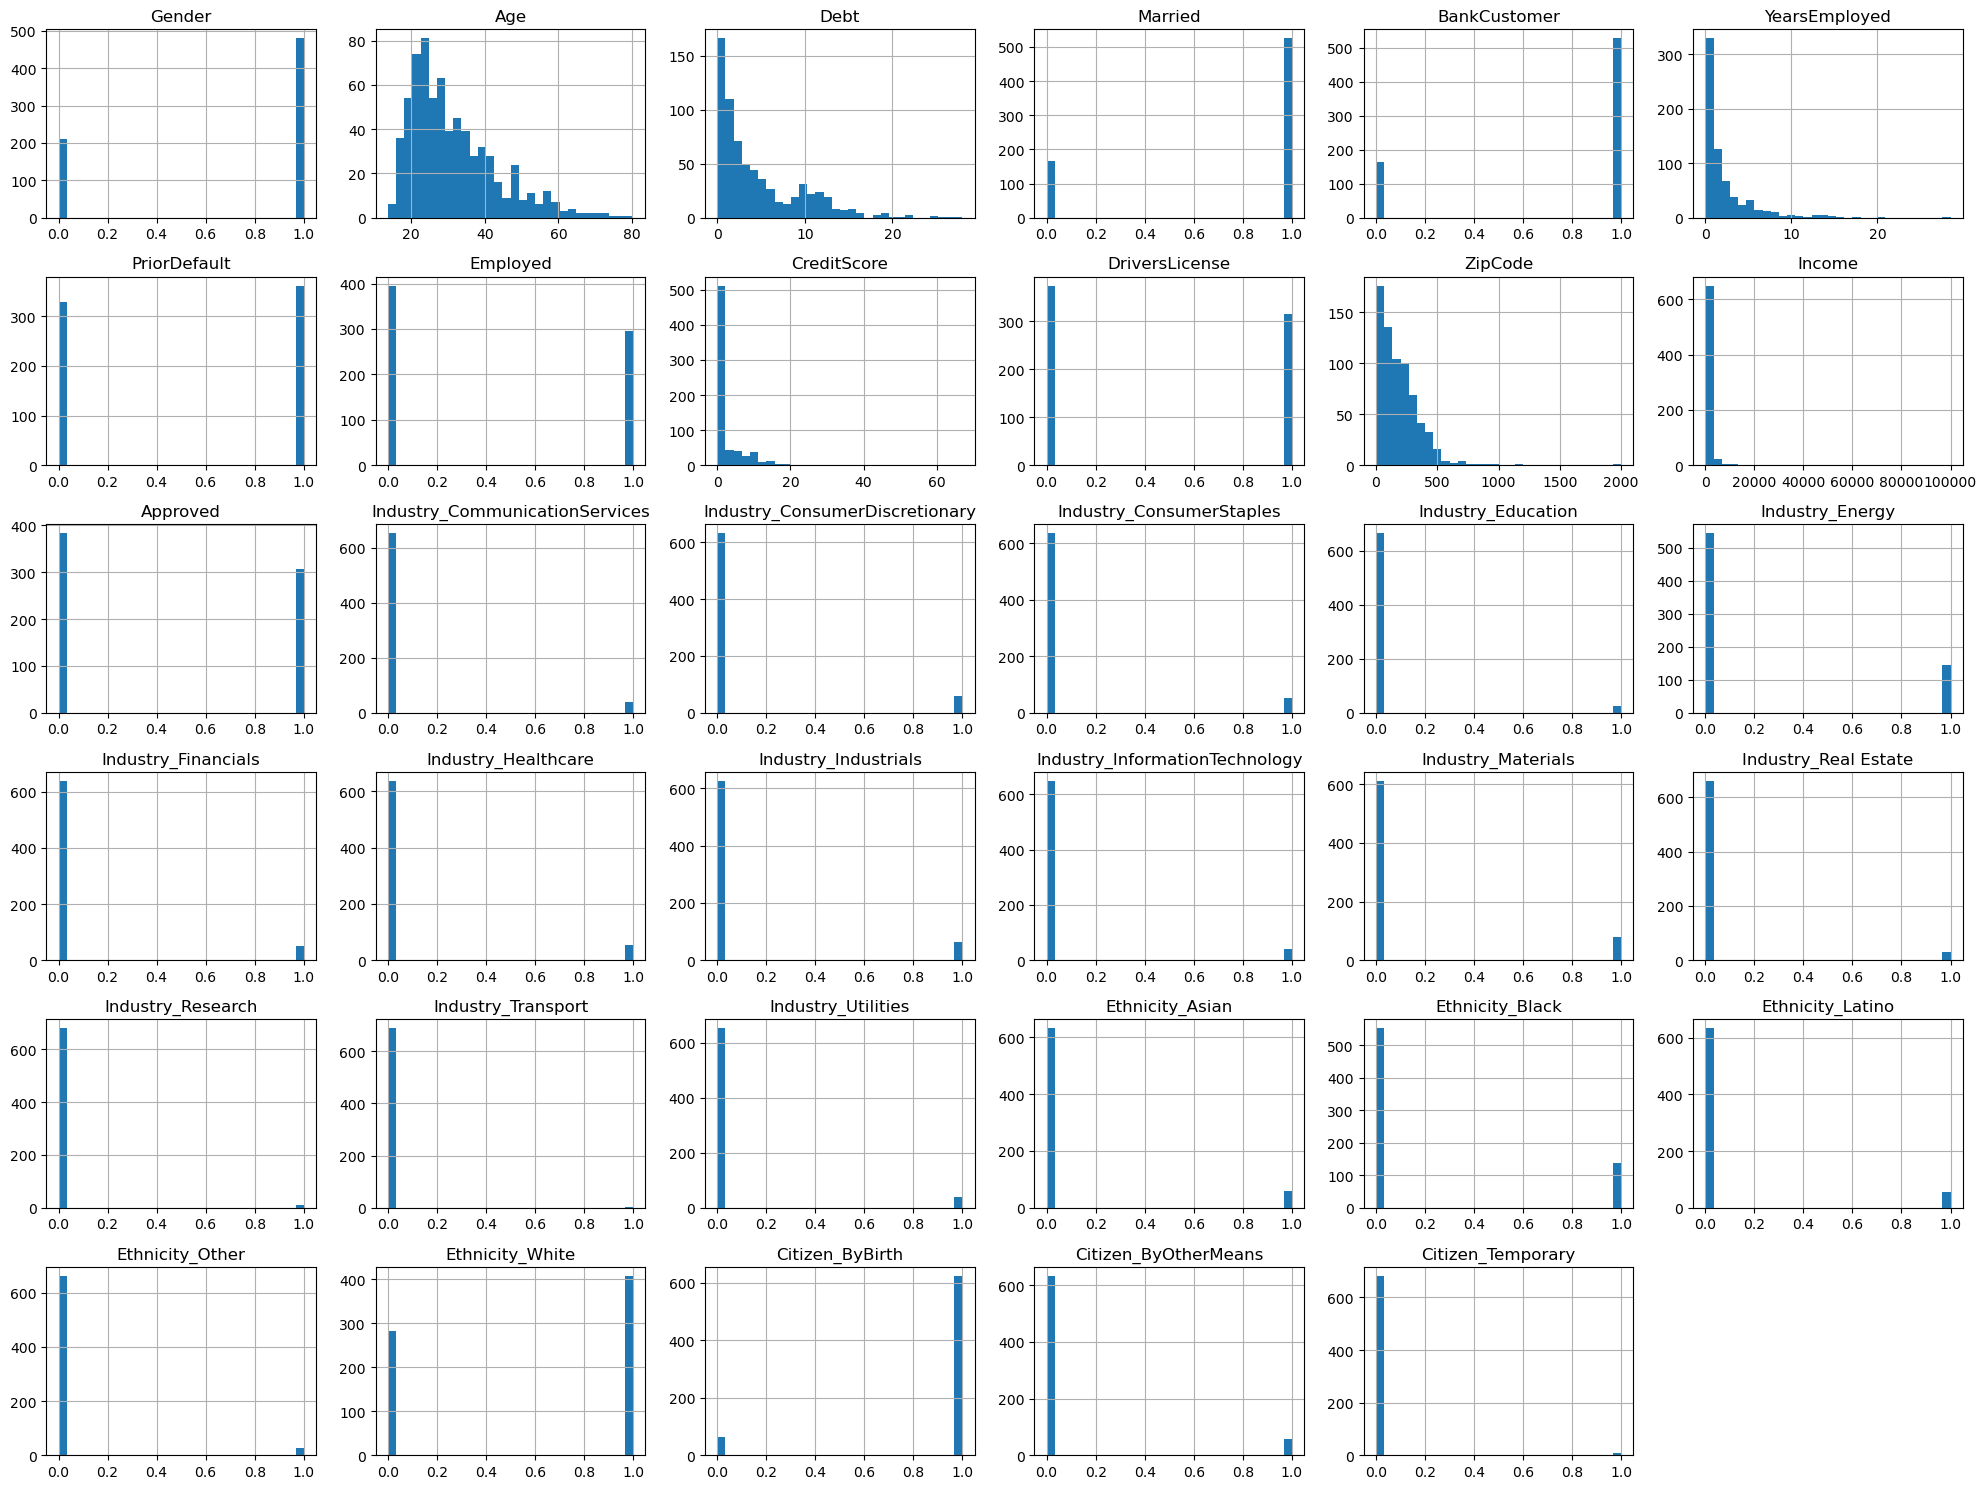

                                  Gender       Age      Debt       Married  \
Gender                          1.000000  0.035044 -0.041746 -6.806208e-02   
Age                             0.035044  1.000000  0.202177  1.069291e-01   
Debt                           -0.041746  0.202177  1.000000  7.464878e-02   
Married                        -0.068062  0.106929  0.074649  1.000000e+00   
BankCustomer                   -0.071250  0.099477  0.083781  9.920331e-01   
YearsEmployed                   0.086544  0.391464  0.298902  6.994456e-02   
PriorDefault                   -0.026047  0.204434  0.244317  1.450732e-01   
Employed                       -0.077784  0.086037  0.174846  1.754276e-01   
CreditScore                    -0.024630  0.187327  0.271207  1.139678e-01   
DriversLicense                  0.051674  0.053599 -0.013023 -9.784401e-03   
ZipCode                         0.086007 -0.078690 -0.217903 -1.707399e-02   
Income                         -0.002063  0.018719  0.123121 -6.

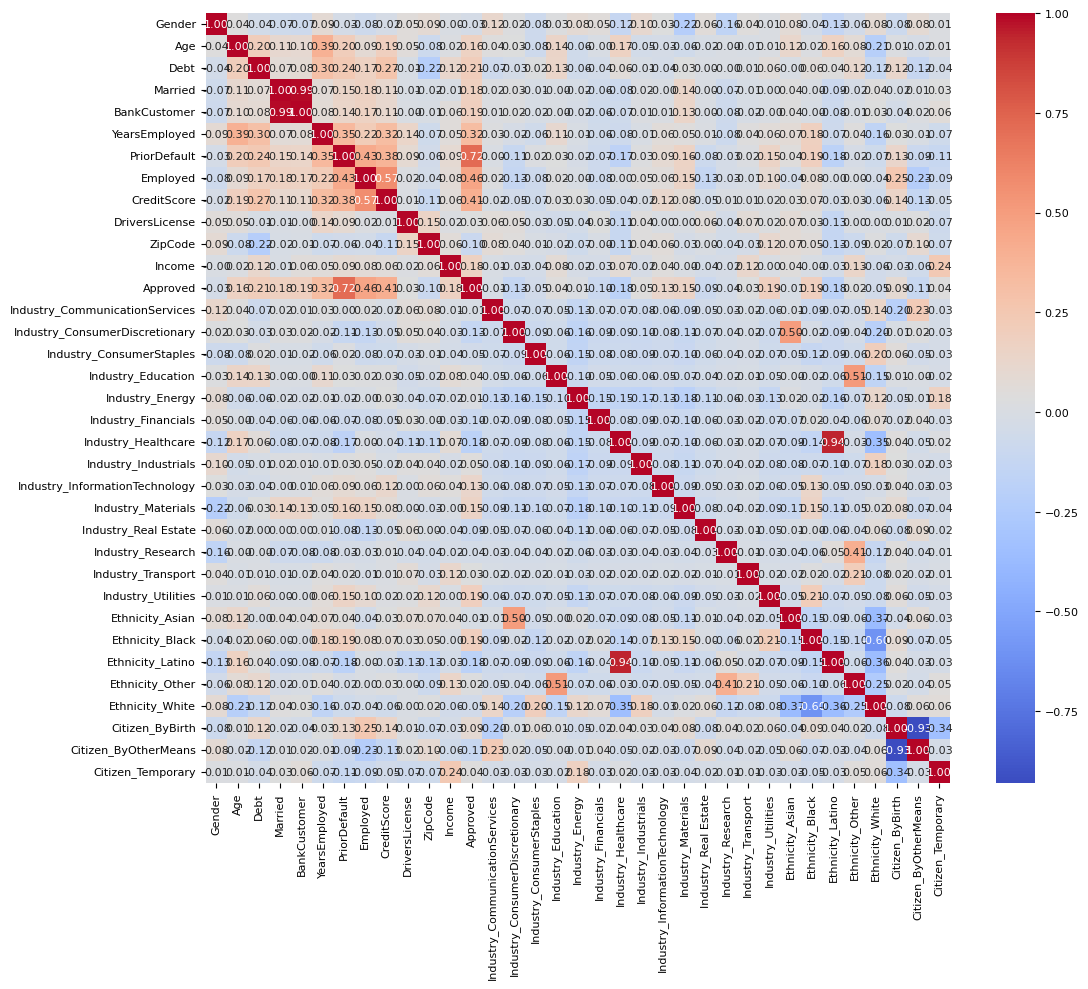

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all variables
data.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

# Calculate the correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

# Decrease font size
plt.rcParams['font.size'] = 8

# Decrease font size
plt.rcParams['font.size'] = 8

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [14]:
# Segregate features and labels into separate variables
X = data.drop('Approved', axis=1)
y = data['Approved']

# Split into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Use it to rescale X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate and train a Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

In [16]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
random_state=None, solver='warn', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

Accuracy of Random Forest classifier: 0.8405797101449275
[[60  8]
 [14 56]]


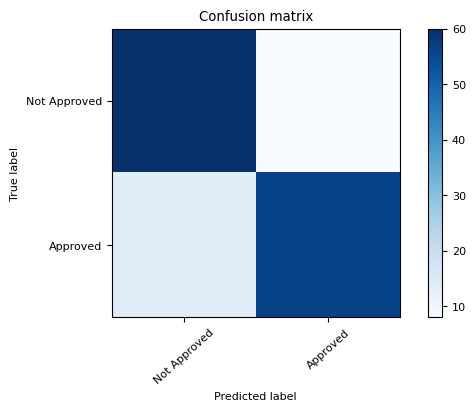

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy of Random Forest classifier: {rf_accuracy}")

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Not Approved', 'Approved'], rotation=42)
plt.yticks(tick_marks, ['Not Approved', 'Approved'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

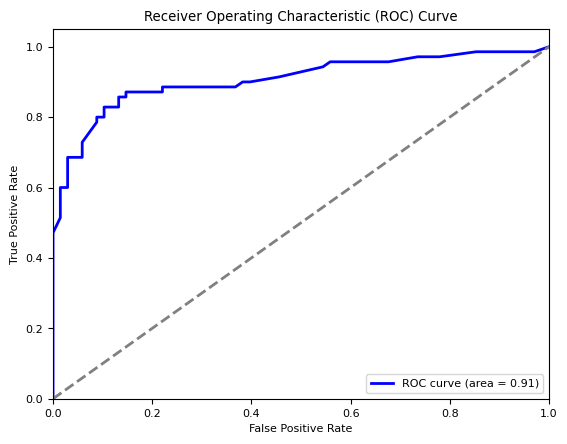

In [39]:
import sklearn.metrics as metrics

# Calculate and plot the ROC curve
rf_probs = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
roc_auc = roc_auc_score(y_test, rf_probs)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()